# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

In [3]:
import pandas as pd

In [6]:
chd_df = pd.read_csv('../tutorials/data/SAheart.data')

### Stpe 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

In [7]:
chd_df.shape

(462, 11)

In [8]:
chd_df.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


### Step 4: Encode the categorical variable *famhist* using OHE (One Hot Encoding)

In [10]:
chd_encoded_df = pd.get_dummies( chd_df,
                                columns = ['famhist'] )

In [11]:
chd_encoded_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


### Step 5: Split the dataset into train and test 

Note: Split using 80:20 rule. Use random_state value 100.


In [12]:
chd_encoded_df.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age', 'chd', 'famhist_Absent', 'famhist_Present'],
      dtype='object')

In [14]:
X_features = list(chd_encoded_df.columns)

In [15]:
X_features.remove('chd')

In [16]:
X = chd_encoded_df[X_features]
y = chd_encoded_df.chd

In [17]:
X[0:2]

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0


In [18]:
y[0:2]

0    1
1    1
Name: chd, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [21]:
X_train.shape

(369, 11)

In [23]:
X_test.shape

(93, 11)

### Step 6: Build a Classification Model

Note: Use any one of the following models:

1. Logistic Regression
2. KNN
3. Decision Tree

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [26]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

In [27]:
logreg_v1.intercept_

array([-5.68343404])

In [28]:
logreg_v1.coef_

array([[-0.00158574,  0.00748014,  0.05765147,  0.17742637,  0.01833347,
         0.03689033, -0.06044873, -0.00061038,  0.05311106, -0.60773364,
         0.57718246]])

In [29]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'row.names': -0.0015857439672809705,
 'sbp': 0.007480136592534479,
 'tobacco': 0.05765147133807696,
 'ldl': 0.17742636713046356,
 'adiposity': 0.018333469585405587,
 'typea': 0.03689033017702918,
 'obesity': -0.0604487270468196,
 'alcohol': -0.0006103821796305796,
 'age': 0.053111055833087034,
 'famhist_Absent': -0.6077336380920851,
 'famhist_Present': 0.5771824551850622}

In [30]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [31]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [32]:
y_logreg_v1[0:10]

,actual,predicted
302,0,0
424,1,0
236,0,0
272,0,0
360,1,1
402,1,1
458,1,0
445,0,0
22,0,1
97,0,0


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.7204301075268817

### Evaluating the model

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [37]:
cm_v1

array([[21, 17],
       [ 9, 46]])

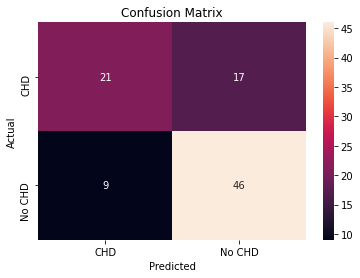

In [40]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['CHD', 'No CHD'],
            yticklabels = ['CHD', 'No CHD'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [41]:
from sklearn.metrics import classification_report

In [42]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        55
           1       0.70      0.55      0.62        38

    accuracy                           0.72        93
   macro avg       0.72      0.69      0.70        93
weighted avg       0.72      0.72      0.71        93



### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_v1 = KNeighborsClassifier(n_neighbors = 10)

In [45]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
knn_pred = knn_v1.predict(X_test)

In [47]:
cm_knn = confusion_matrix(y_test, knn_pred, [1,0])

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


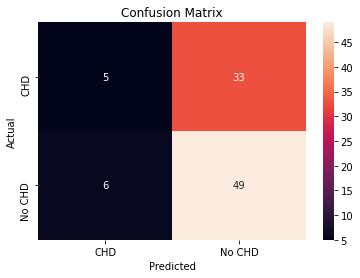

In [48]:
sn.heatmap( cm_knn, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['CHD', 'No CHD'],
            yticklabels = ['CHD', 'No CHD'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [49]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72        55
           1       0.45      0.13      0.20        38

    accuracy                           0.58        93
   macro avg       0.53      0.51      0.46        93
weighted avg       0.54      0.58      0.51        93



In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
knn_v1 = KNeighborsClassifier()

In [52]:
params = { "n_neighbors": [10, 15, 20, 25, 30],
           "weights": ['uniform', 'distance']}

In [53]:
knn_grid = GridSearchCV(knn_v1,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [54]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [55]:
knn_grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [56]:
knn_grid.best_score_

0.2615384615384615

In [57]:
best_knn_v2 = knn_grid.best_estimator_

### Step 7: Create confusion matrix

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )

In [60]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

In [61]:
y_tree_pred = tree_v2.predict( X_test )

In [62]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


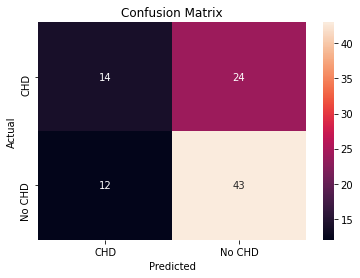

In [63]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['CHD', 'No CHD'],
            yticklabels = ['CHD', 'No CHD'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [64]:
print( classification_report( y_test,
                       y_tree_pred ) )

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        55
           1       0.54      0.37      0.44        38

    accuracy                           0.61        93
   macro avg       0.59      0.58      0.57        93
weighted avg       0.60      0.61      0.60        93



### Step 8: Find the Precision and recall for the *chd* classes.